# Calculating time spent in radio quiet cone

### For a given coordinates in Earth_X and Sun_X coordinate system it can be determined if the s/c is in radioquiet cone or not

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as wids
from ipywidgets import interact

In [4]:
df=pd.read_csv("07Sep2025_1days.csv", header= None)

filename= "07 Sep 2025"


In [5]:

#choose header file based on the data in the file
# a header.txt file is generated in script to keep track of the parameters

header= "lunar_probe.ElapsedSecs,lunar_probe.ElapsedDays,lunar_probe.Luna.Altitude,lunar_probe.Luna.Longitude,\
lunar_probe.Earth_X.RA,lunar_probe.Sun_X.RA,lunar_probe.Luna.Latitude,lunar_probe.Earth_X.DEC,\
lunar_probe.Sun_X.DEC,lunar_probe.LunaFixed.VMAG,lunar_probe.Earth_X.VMAG,lunar_probe.Sun_X.VMAG"


col_names=header.split(",")
print("columns= ",len(df.columns),"\nheader= ", len(col_names))
print(col_names)

df.columns= col_names

columns=  12 
header=  12
['lunar_probe.ElapsedSecs', 'lunar_probe.ElapsedDays', 'lunar_probe.Luna.Altitude', 'lunar_probe.Luna.Longitude', 'lunar_probe.Earth_X.RA', 'lunar_probe.Sun_X.RA', 'lunar_probe.Luna.Latitude', 'lunar_probe.Earth_X.DEC', 'lunar_probe.Sun_X.DEC', 'lunar_probe.LunaFixed.VMAG', 'lunar_probe.Earth_X.VMAG', 'lunar_probe.Sun_X.VMAG']


In [6]:
display(df.head(5))
display(df.tail(5))

lunar_probe.ElapsedSecs  lunar_probe.ElapsedDays  \
0                 0.000000                 0.000000   
1                40.528823                 0.000469   
2                81.056109                 0.000938   
3               121.580350                 0.001407   
4               162.100023                 0.001876   

   lunar_probe.Luna.Altitude  lunar_probe.Luna.Longitude  \
0                 125.130950                1.105537e-13   
1                 125.113696                2.000000e+00   
2                 125.061973                4.000000e+00   
3                 124.975923                6.000000e+00   
4                 124.855753                8.000000e+00   

   lunar_probe.Earth_X.RA  lunar_probe.Sun_X.RA  lunar_probe.Luna.Latitude  \
0                4.927596             -5.110075               5.956106e-14   
1                6.907405             -3.106768               5.248323e-02   
2                8.886928             -1.103491               1.049098e-01   
3               10.866260              0.899768               1.572125e-01   
4               12.845502              2.903019               2.093243e-01   

   lunar_probe.Earth_X.DEC  lunar_probe.Sun_X.DEC  lunar_probe.LunaFixed.VMAG  \
0                -1.097688              -0.308730                    1.605385   
1                -0.809909              -0.197122                    1.605401   
2                -0.521150              -0.085265                    1.605444   
3                -0.231761               0.026700                    1.605515   
4                 0.057906               0.138634                    1.605615   

   lunar_probe.Earth_X.VMAG  lunar_probe.Sun_X.VMAG  
0                  1.605110                1.609967  
1                  1.605125                1.609982  
2                  1.605168                1.610025  
3                  1.605239                1.610096  
4                  1.605339                1.610195

lunar_probe.ElapsedSecs  lunar_probe.ElapsedDays  \
2191             86212.276962                 0.997827   
2192             86252.090598                 0.998288   
2193             86291.870243                 0.998748   
2194             86331.615371                 0.999209   
2195             86371.325522                 0.999668   

      lunar_probe.Luna.Altitude  lunar_probe.Luna.Longitude  \
2191                 109.645034                   61.999999   
2192                 108.868888                   63.999999   
2193                 108.080153                   65.999999   
2194                 107.279795                   67.999999   
2195                 106.468699                   69.999999   

      lunar_probe.Earth_X.RA  lunar_probe.Sun_X.RA  lunar_probe.Luna.Latitude  \
2191               65.600655             69.000751                   1.704143   
2192               67.616186             71.008497                   1.711153   
2193               69.632662             73.016344                   1.716072   
2194               71.649997             75.024281                   1.718894   
2195               73.668104             77.032296                   1.719613   

      lunar_probe.Earth_X.DEC  lunar_probe.Sun_X.DEC  \
2191                 7.911769               3.248018   
2192                 8.012904               3.279416   
2193                 8.104189               3.306800   
2194                 8.185504               3.330134   
2195                 8.256744               3.349387   

      lunar_probe.LunaFixed.VMAG  lunar_probe.Earth_X.VMAG  \
2191                    1.618827                  1.618447   
2192                    1.619510                  1.619131   
2193                    1.620209                  1.619829   
2194                    1.620923                  1.620543   
2195                    1.621648                  1.621269   

      lunar_probe.Sun_X.VMAG  
2191                1.623369  
2192                1.624050  
2193                1.624747  
2194                1.625459  
2195                1.626182

## Velocities in the 3 coordinate system. Since Earth_X,Sun_X and LunaFixed coordinate sytems are not inertial, their velocities differ from each other.

In [7]:

for index,name in enumerate(df.columns):
    print(index,name)
    
    
df_t=df.iloc[:,[0,1,2,3,4,5,6,7,8]]#get useful values
df_t.tail()

0 lunar_probe.ElapsedSecs
1 lunar_probe.ElapsedDays
2 lunar_probe.Luna.Altitude
3 lunar_probe.Luna.Longitude
4 lunar_probe.Earth_X.RA
5 lunar_probe.Sun_X.RA
6 lunar_probe.Luna.Latitude
7 lunar_probe.Earth_X.DEC
8 lunar_probe.Sun_X.DEC
9 lunar_probe.LunaFixed.VMAG
10 lunar_probe.Earth_X.VMAG
11 lunar_probe.Sun_X.VMAG


lunar_probe.ElapsedSecs  lunar_probe.ElapsedDays  \
2191             86212.276962                 0.997827   
2192             86252.090598                 0.998288   
2193             86291.870243                 0.998748   
2194             86331.615371                 0.999209   
2195             86371.325522                 0.999668   

      lunar_probe.Luna.Altitude  lunar_probe.Luna.Longitude  \
2191                 109.645034                   61.999999   
2192                 108.868888                   63.999999   
2193                 108.080153                   65.999999   
2194                 107.279795                   67.999999   
2195                 106.468699                   69.999999   

      lunar_probe.Earth_X.RA  lunar_probe.Sun_X.RA  lunar_probe.Luna.Latitude  \
2191               65.600655             69.000751                   1.704143   
2192               67.616186             71.008497                   1.711153   
2193               69.632662             73.016344                   1.716072   
2194               71.649997             75.024281                   1.718894   
2195               73.668104             77.032296                   1.719613   

      lunar_probe.Earth_X.DEC  lunar_probe.Sun_X.DEC  
2191                 7.911769               3.248018  
2192                 8.012904               3.279416  
2193                 8.104189               3.306800  
2194                 8.185504               3.330134  
2195                 8.256744               3.349387

In [11]:
%matplotlib qt

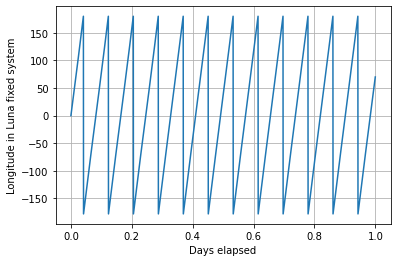

In [9]:
# Just to check that s/c propogates uniformly and does not end in quet cone at the end of simulation

%matplotlib inline
plt.figure(1)
plt.plot(df_t["lunar_probe.ElapsedDays"],df_t["lunar_probe.Luna.Longitude"]) # longitude in LunaFixed vs ElapsedDays
plt.xlabel("Days elapsed")
plt.ylabel("Longitude in Luna fixed system")
plt.grid()

# EARTH CONE



# Coeffiecents from the python program that calculates the width of the quiet cone

### check only needed when longitude in range $(93^\circ ,115^\circ)$ East or West as the boundary of the quiet cone lies in this region


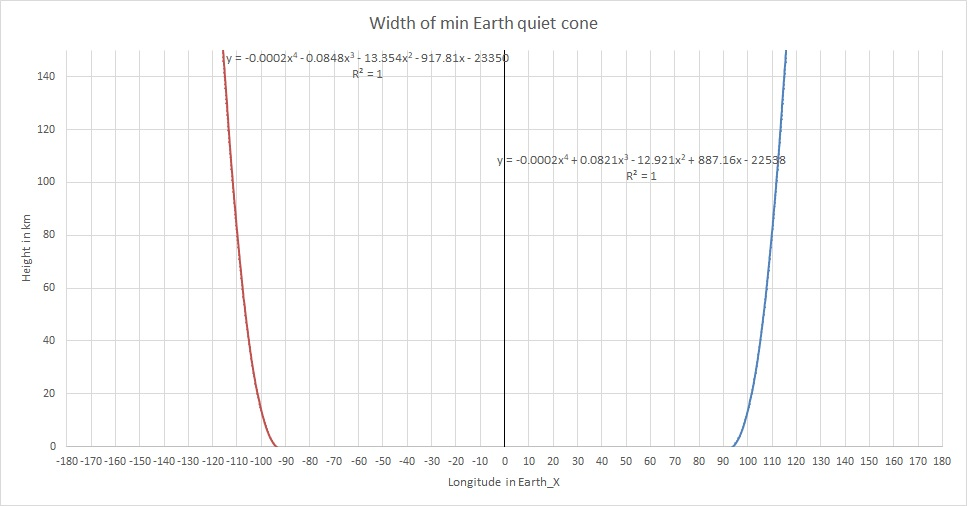



## Checking if s/c is in Earth shadow or not and making a column of boolean values


In [168]:
P_coef= np.array([-0.000190753,0.082124484,-12.92130989,887.1567053,-22538.17666]) # for long >0
N_coef=np.array([-0.000197082,-0.084828261,-13.35374984,-917.8126915,-23350.44014]) # for long <0

earth_cone= pd.read_csv("earth_cone.csv",header=0)
earth_cone.head()



height      Plong      Nlong
0  0.000000  93.492475 -93.543440
1  0.501672  94.231855 -94.280157
2  1.003344  94.692573 -94.739328
3  1.505017  95.079708 -95.125791
4  2.006689  95.434054 -95.480163

In [175]:

# deleteing if column already present    
if "in Econe" in df_t.columns:
    del df_t["in Econe"]
    
    
#------------------- making a column of True/False whether s/c is in shadow region of earth or not


def check_in_Econe(row): # check if s/c is in cone or not, given longitude in Earth_X and altitude
    longitude, height= row["lunar_probe.Earth_X.RA"], row["lunar_probe.Luna.Altitude"]
    
    alt_exp=0 # altitude of the cone, if height below this then s/c is in cone
    
    if (abs(longitude)> 93 and abs(longitude)<= 115): # boundary of cone
        
        if (longitude > 0): # if on poitive side of longitudes

            for power in range(5):
                alt_exp+= (P_coef[4-power]*(longitude**power))

        else:

            for power in range(5):
                alt_exp+= (N_coef[4-power]*(longitude**power))

        if height <= alt_exp :
            return True
        else:
            return False
    elif ( abs(longitude) > 115):
        return True # s/c is definetely in cone 
    else:
        return False # s/c is definetly outside cone
    
df_t['in Econe'] = df_t.apply (lambda row: check_in_Econe(row), axis=1)# make a new column if s/c in Earth cone or not

display(df_t.sample(5))

#----------------------------------------------------------------------------
# Calculating time spent in shadow region of Earth

day_cone= 0 # total time

day_begin=0 # time at which s/c enters earth cone
day_end=0 # time at which s/c leaves earth cone

for index,row in df_t.iterrows():
        
    if index>0 :
        if row["in Econe"]==False:
            if df_t.iloc[index-1]["in Econe"]==True: # s/c has just come out of cone
                day_end= df_t.iloc[index-1]["lunar_probe.ElapsedDays"]# just to be sure day_last is last value in quiet cone
                
#                 print(day_begin, day_end,(day_end- day_begin))
                day_cone+= (day_end- day_begin)
                day_end=day_begin=0
            
            else: # s/c was already outside cone
                pass

        else:# E_cone value is true.... s/c is in cone
            
            if df_t.iloc[index-1]["in Econe"]==True:# s/c was already in cone 
                day_end= row["lunar_probe.ElapsedDays"]
                
            else: # last value was FALSE and s/c has just entered cone
                day_begin= day_end= row["lunar_probe.ElapsedDays"]

                
# print(day_begin, day_end,(day_end- day_begin)) 
if (day_begin != day_end):
    day_cone+=  (day_end- day_begin)# in case simulation ended while s/c was in cone  


print("Days spent in earth quiet cone cumulative ",day_cone)
print("Hours spent in earth quiet cone cumulative ",day_cone*24)
        
        

lunar_probe.ElapsedSecs  lunar_probe.ElapsedDays  \
648              25471.156135                 0.294805   
758              29848.440587                 0.345468   
1904             74881.970889                 0.866689   
151               5911.247072                 0.068417   
1797             70683.359548                 0.818094   

      lunar_probe.Luna.Altitude  lunar_probe.Luna.Longitude  \
648                   76.331778                      -144.0   
758                  104.052608                        76.0   
1904                  75.494835                      -152.0   
151                  111.917781                       -58.0   
1797                 123.083536                        -6.0   

      lunar_probe.Earth_X.RA  lunar_probe.Sun_X.RA  lunar_probe.Luna.Latitude  \
648              -139.695678           -145.564308                  -1.058702   
758                80.357088             75.067065                   1.553869   
1904             -148.314804           -146.606925                  -1.222607   
151               -52.987510            -62.258226                  -1.255915   
1797               -1.964656             -1.162878                   0.320609   

      lunar_probe.Earth_X.DEC  lunar_probe.Sun_X.DEC  in Scone  in Pcone  \
648                 -4.515735              -1.901626      True      True   
758                  8.003273               3.163551     False     False   
1904                -4.630058              -2.053323      True      True   
151                 -7.497255              -2.837420     False     False   
1797                -0.212338               0.157001     False     False   

      in Econe  
648       True  
758      False  
1904      True  
151      False  
1797     False

Days spent in earth quiet cone cumulative  0.3633269940146422
Hours spent in earth quiet cone cumulative  8.719847856351413


# SUN CONE

![test](sun1.jpg)


## For my simulations I have considered RA angles (in Sun_X system) > $110^\circ$ to be in Sun Quiet Cone

In [176]:
# deleting column if already present

if "in Scone" in df_t.columns:
    del df_t["in Scone"]
    
if "in Pcone" in df_t.columns:
    del df_t["in Pcone"]
    
    
#--------------------------------------------- SUN cone----------------


def check_in_Scone(row):
    slong= row["lunar_probe.Sun_X.RA"]
    
    if abs(slong)>110:
        return True
    else:
        return False
    
df_t["in Scone"] = df_t.apply (lambda row: check_in_Scone(row), axis=1)# make a new column if s/c in Sun cone or not



#--------------------------------------------- PRIME cone----------------



def check_in_Pcone(row):# check if s/c is on both cones or not
    
    if  row["in Econe"]==True and row["in Scone"]==True:
        return True
    else:
        return False
    
df_t["in Pcone"] = df_t.apply (lambda row: check_in_Pcone(row), axis=1)# make a new column if s/c in both cones or not



display(df_t.sample(5))




        

lunar_probe.ElapsedSecs  lunar_probe.ElapsedDays  \
226               8923.201590                 0.103278   
808              31786.119589                 0.367895   
1887             74230.868854                 0.859154   
705              27715.334339                 0.320779   
2166             85208.057399                 0.986204   

      lunar_probe.Luna.Altitude  lunar_probe.Luna.Longitude  \
226                   96.696601                        92.0   
808                   71.689483                       176.0   
1887                  72.894721                       174.0   
705                  120.700631                       -30.0   
2166                 122.374714                        12.0   

      lunar_probe.Earth_X.RA  lunar_probe.Sun_X.RA  lunar_probe.Luna.Latitude  \
226                96.710166             88.134054                   1.508616   
808              -179.436426            175.364621                  -0.118556   
1887              177.981434            179.335728                  -0.352615   
705               -25.184640            -31.182715                  -0.607951   
2166               15.639356             18.857951                   0.914708   

      lunar_probe.Earth_X.DEC  lunar_probe.Sun_X.DEC  in Econe  in Scone  \
226                  8.287441               3.207827     False     False   
808                  0.878752               0.163708      True      True   
1887                 0.116405              -0.205244      True      True   
705                 -4.511822              -1.616367     False     False   
2166                 2.750998               1.348355     False     False   

      in Pcone  
226      False  
808       True  
1887      True  
705      False  
2166     False

In [136]:
lone_e=True  
lone_s=True
lone_p=True

for index,row in df_t.iterrows():
    if index==0 or index==len(df_t)-1: # if first or  last entry then skip
        continue

    else:
        if row["in Econe"]==True and lone_e:
            if df_t.iloc[index-1]["in Econe"]==False and df_t.iloc[index+1]["in Econe"]==False:
                lone_e= False # if values just before and after a TRUE value are FALSE then it is a lone true value
            
            
        if row["in Scone"]==True and lone_s:
            if df_t.iloc[index-1]["in Scone"]==False and df_t.iloc[index+1]["in Scone"]==False:
                lone_s= False # if values just before and after a TRUE are FALSE then lone true value
                
        if row["in Pcone"]==True and lone_p:
            if df_t.iloc[index-1]["in Pcone"]==False and df_t.iloc[index+1]["in Pcone"]==False: # counting lone true values
                lone_p= False
                
               
               
print("Is there any lone true values in  \"in Econe\" column: ",not lone_e)

print("Is there any lone true values in  \"in Scone\" column: ",not lone_s)

print("Is there any lone true values in  \"in Pcone\" column: ",not lone_p)


Is there any lone true values in  "in Econe" column:  False
Is there any lone true values in  "in Scone" column:  False
Is there any lone true values in  "in Pcone" column:  False


# Time Spent in Quiet Cone cumulatively

In [177]:
# ----------------------------- check time spent in both cones cumulatively.. that is Prime cone

cone_times=np.zeros(0) # array of all the times it is in cone in each orbit

cone_long= np.zeros(0) # array of count of longitudes the s/c spends inside cone >1 (cannot make sense of lone true values)


long_begin=0
long_end=0

days= np.zeros(0) # array of elapsed days when s/c comes outside prime cone 

day_cone= 0 # total time
day_begin=0 # time at which s/c enters cone
day_end=0 # time at which s/c leaves cone



for index,row in df_t.iterrows():
    if index==0:# if first or  last entry then skip
        continue
        
    elif index==len(df_t)-1:# For last entry in file
        if row["in Pcone"]==True:
            if df_t.iloc[index-1]["in Pcone"]==True:# s/c was already in cone
                day_end=row["lunar_probe.ElapsedDays"]
                long_end= row["lunar_probe.Luna.Longitude"]
                long_end= long_end if long_end>0 else (360+ long_end)
        continue
        
    else:
        if row["in Pcone"]==True:# current value
            #              value above                               value below
            if df_t.iloc[index-1]["in Pcone"]==False and df_t.iloc[index+1]["in Pcone"]==False: #lone true value
                day_end= day_begin=0
                long_begin = long_end=0
                continue
                
            if df_t.iloc[index-1]["in Pcone"]==True and df_t.iloc[index+1]["in Pcone"]==False: # last true value
                day_end= row["lunar_probe.ElapsedDays"]
                long_end= row["lunar_probe.Luna.Longitude"]
                long_end= long_end if long_end>0 else (360+ long_end)

                day_cone+= (day_end-day_begin)
                cone_times= np.append(cone_times, (day_end- day_begin))
                cone_long= np.append(cone_long, (long_end- long_begin))
                days= np.append(days, day_end)
                

                long_end= long_end= 0
                day_end= day_begin=0
                continue
                
            if df_t.iloc[index-1]["in Pcone"]==True and df_t.iloc[index+1]["in Pcone"]==True:# middle true value
                day_end=row["lunar_probe.ElapsedDays"]
                long_end= row["lunar_probe.Luna.Longitude"]
                long_end= long_end if long_end>0 else (360+ long_end)
                continue
            
            if df_t.iloc[index-1]["in Pcone"]==False and df_t.iloc[index+1]["in Pcone"]==True:# first true value
                day_begin= day_end= row["lunar_probe.ElapsedDays"]
                long_begin= long_end= row["lunar_probe.Luna.Longitude"]
                long_end= long_end if long_end>0 else (360+ long_end)
                long_begin= long_begin if long_begin>0 else (360+ long_begin)
                
                continue
                
        else: #row["in Pcone"] is Fasle:
            continue
                
            
    
                
# print(day_begin, day_end,(day_end- day_begin))
if (day_end != day_begin):# in case simulation ended while s/c was in cone and last time in cone was not added
    day_cone+=  (day_end- day_begin)
    days= np.append( days, day_end)
    cone_times= np.append(cone_times, (day_end- day_begin))
    cone_long= np.append(cone_long, (long_end- long_begin))
    


print("Days spent in Prime cone cumulative ",day_cone," days")  
print("Hours spent in Prime cone cumulative ",day_cone*24," hrs")  
print("Max and Min time spent in Prime cone", cone_times.max()*24*60," mins  ", cone_times.min()*24*60, " mins")

Days spent in Prime cone cumulative  0.35567086926675984  days
Hours spent in Prime cone cumulative  8.536100862402236  hrs
Max and Min time spent in Prime cone 43.63113364437595  mins   40.96721672918654  mins


# cone_times is an array of all the time the spacecraft spends in quiet cone at any passing

# cone_long is an array of the number of longitudes (steps) s/c spends inside Prime cone. This value is always >1.

# days is an array of DaysElapsed when s/c comes out of prime cone during each orbit

In [179]:
%matplotlib qt
P_times= {"orbit":np.arange(len(cone_times))+1,"Days":days,"P time":cone_times*24*60, "long crossed": cone_long}

# index number ; days elapsed when coming out ; time in mins


time_df=pd.DataFrame(P_times)

plt.figure(2)
plt.scatter(time_df["orbit"], time_df["P time"], marker="^", s= 50)

for i, long_val in enumerate(time_df["long crossed"]):
    
    
    plt.text(time_df["orbit"][i] ,time_df["P time"][i]-.10 , str(round(long_val,2)),
             fontsize=20,
             horizontalalignment='center',verticalalignment='top', # number of longitudes spent in prime cone
             color= "red", clip_on=True)
    
    plt.text(time_df["orbit"][i] ,time_df["P time"][i]+.10 , str(round(time_df["P time"][i],2)),
             fontsize=20,
             horizontalalignment='center',verticalalignment='bottom', # number of longitudes spent in prime cone
             color= "blue", clip_on=True)

plt.xlim(left=0, right= time_df["orbit"].max()+1)


plt.ylim(34, 45)



plt.text(1, 39, "Time (min) spent in Prime cone",
         color= "blue", fontsize= 20,
        bbox={"facecolor": "None", "alpha": 1, "edgecolor": "blue"})
plt.text(1, 38.5, "Number of Longitudes in Prime cone",
         color= "red", fontsize= 20,
        bbox={"facecolor": "None", "alpha": 1, "edgecolor": "red"})

################################  SET accordingly   ##############

plt.title( filename, fontsize=25) 

#####################################################################




plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Orbit around moon", fontsize=25)
plt.ylabel("Time in Minutes", fontsize=25)
plt.grid()
plt.show()


display(time_df)

orbit      Days     P time  long crossed
0       1  0.055202  40.967217         128.0
1       2  0.137155  41.621556         130.0
2       3  0.219107  41.628656         130.0
3       4  0.301060  42.283720         132.0
4       5  0.383012  42.290807         132.0
5       6  0.464964  42.946591         134.0
6       7  0.546917  42.953659         134.0
7       8  0.628869  43.610158         136.0
8       9  0.710821  43.617203         136.0
9      10  0.792774  43.624196         136.0
10     11  0.874726  43.631134         136.0
11     12  0.956229  42.991153         134.0

# Plotting altitude in LunaFixed coordinate system

###  code written is basically to get rid of the horizontal line that are plotted when longitude changes from +ve to -ve . The idea is to plot only those altitudes at a time in which longitude is strictly increasing from -180 to +180. Such a sequence is plotted one at a time.


In [91]:
x_vals= np.array(df_t["lunar_probe.Luna.Longitude"]) # OR you can take every second value to reduce complexity
y_vals= np.array(df_t["lunar_probe.Luna.Altitude"])

plot_x=np.zeros(0)  # to store plottable values during each orbit... bascially x_vals should be in strictly insreasing order
plot_y=np.zeros(0)

plt.figure(3)

for i, long_val in enumerate(x_vals):
    if (long_val<-179.5 or long_val>179.5 ):  # to skip horizontal lines when going 170 to -180 or 180 to -170 
            #now the long_val is guarenteed to be -180 or +180 
            
            if (long_val<0): # long value is -ve -180
                    
                plot_x= np.append(plot_x, -x_vals[i])# add longitude to the positive side at +180 deg
                plot_y= np.append(plot_y, y_vals[i]) # add altitude value
                    
                plt.plot(plot_x, plot_y, linewidth=.1 ,marker= "^", markersize=1 ,color="red")     # plot plottable values
                
                plot_x=np.zeros(0)   # dump the array values
                plot_y=np.zeros(0)
                    
                plot_x= np.append(plot_x, x_vals[i])# to the new array add -180 deg longitude value
                plot_y= np.append(plot_y, y_vals[i]) 
                    
            else: # longitude value is +vs +180
                plot_x= np.append(plot_x, x_vals[i])# add a +180 deg longitude value
                plot_y= np.append(plot_y, y_vals[i])
                
                plt.plot(plot_x, plot_y, linewidth=.1,marker= "^", markersize=1 ,color="red")     # plot plottable values
                
                plot_x=np.zeros(0)   # dump the array values
                plot_y=np.zeros(0)
                    
                plot_x= np.append(plot_x, -x_vals[i])# to the new array add -180 deg longitude value
                plot_y= np.append(plot_y,  y_vals[i])
         
        
        
        
    else:
        plot_x= np.append(plot_x, x_vals[i])  # plottable x_values should be in increasing order
        plot_y= np.append(plot_y, y_vals[i])
 

#
if (len(plot_x)>0): # in case for loop exited without printing last sequence of prinatble value
    plt.plot(plot_x, plot_y, linewidth=.1,marker= "^", markersize=1 ,color="red")     # plot plottable values
    
    
print("Plot stops at ",plot_x[-1], "deg") # plot stops at this point

plot_x=np.zeros(0)   # dump the array values
plot_y=np.zeros(0)
    
    
################################  SET according to file opened 

plt.title("Altitude of s/c for 1 days centered 26 Jan", fontsize=25) 

#####################################################################


plt.xlim(-180, 180)
# plt.ylim(60, 130)
plt.xticks(np.arange(-180, 180, 10))

plt.xlabel("Longitude LunaFixed", fontsize=25)
plt.ylabel("Altitude", fontsize=25)
plt.grid()
plt.show()

########################################################################
# Queit Cone not added since it is in Earth_X coordinates system and this plot is in Luna Fixed system

Plot stops at  70.00000082867072 deg


# Plotting altitude in Earth_X coordinate system centered around $180^\circ$ longitude in Earth_X System along with Radio Quiet cone of Earth

In [140]:

%matplotlib qt
# -----------------------------------------------------------------------
plt.figure(4)


#-----------------------------------------------------------------
#            plotting the earth quiet cone
#------------------------------------------------------------------

e_cone_px= np.array(earth_cone["Plong"])
e_cone_nx=  np.array(earth_cone["Nlong"])
e_cone_nx= 360+ e_cone_nx
e_cone_h= np.array(earth_cone["height"])


plt.plot(e_cone_px, e_cone_h, color= "green")
plt.plot(e_cone_nx, e_cone_h, color= "green")



#-------------------------------------------------------------------


x_vals= np.array(df_t["lunar_probe.Earth_X.RA"]) # longitude values in Earth_X... +ve and-ve values
y_vals= np.array(df_t["lunar_probe.Luna.Altitude"])

x_vals= np.where(x_vals < 0, 360+x_vals , x_vals)# now s/c RA in Earth_X is from 0 to 360


for i, long_val in enumerate(x_vals):
    
    size= 1
    clr= "red" # if outside Prime cone then red colour
    mark= "^" # if outside Sun cone then triangle marker

    if (df_t["in Pcone"][i]):
        clr="blue"  # if inside Prime cone then blue colour
        size= 35
    if (df_t["in Scone"][i]):
        mark= "o" # if inside Sun cone then star marker
        size= 35


    plt.scatter(x_vals[i], y_vals[i],
                marker= mark, color= clr, s= size) # puts the marker



##############################  SET according to file opened

plt.title("Altitude of s/c on 25 Jan 2024 all orbits ", fontsize=25) #  SET according to file opened
    
##############################################    
    
    
    
    
plt.xticks( fontsize= 20)
plt.yticks( fontsize= 20)
plt.xlim(0, 360)
plt.ylim(0, 150)
plt.grid()
plt.xlabel("Longitude Earth_X", fontsize=25)
plt.ylabel("Altitude", fontsize=25)
plt.show()






In [59]:


def plot_one_orbit( day=1, orbit=1):
    
    low_lim= (orbit-1)*180
    up_lim= orbit* 180
    
    df_t_1= df_t[(df_t["lunar_probe.ElapsedDays"] < day) & (df_t["lunar_probe.ElapsedDays"] >= day-1)][low_lim: up_lim]
    
    
    plot_x=np.zeros(0)  # to store plottable values during each orbit... 
    plot_y=np.zeros(0) # bascially x_vals should be in strictly increasing order
    plt.figure(1 , figsize= (15, 12))
    title= "Day "+ str(day)+ " , orbit "+str(orbit)
    plt.title(title, fontsize=25)
    for i, row in df_t_1.iterrows():
        
        
        clr= "red" # if outside Pcone then red colour
        mark= "+" # if outside Scone then triangell marker
        size=10
        
        if (row["in Pcone"]):
            clr="blue"  # if inside Pcone then green colour
            size= 45
        if (row["in Scone"]):
            mark= "o" # if inside Scone then star marker
            size= 45
        
        x_val= row["lunar_probe.Earth_X.RA"]
        x_val= x_val if x_val>0 else 360+ x_val
        y_val= row["lunar_probe.Luna.Altitude"]
        
        plt.scatter(x_val, y_val,
                   color= clr, marker= mark, s= size)
        
        
        
        
    e_cone_px= np.array(earth_cone["Plong"])
    e_cone_nx=  np.array(earth_cone["Nlong"])
    e_cone_nx= 360+ e_cone_nx
    e_cone_h= np.array(earth_cone["height"])
    
    plt.xlabel("Longitude Earth_X", fontsize=25)
    plt.ylabel("Altitude in km", fontsize=25)
    plt.xticks( fontsize=20)
    plt.yticks( fontsize=20)
    plt.xlim(0, 360)
    plt.ylim(0, 150)
    plt.grid(True, color= "black", lw= 0.5)
    plt.plot(e_cone_px, e_cone_h, color= "green")
    plt.plot(e_cone_nx, e_cone_h, color= "green")
    plt.show



In [141]:
%matplotlib inline
wids.interact(plot_one_orbit,
              day=wids.IntSlider(min=1, max= 3, continuous_update=False)
              ,orbit= wids.IntSlider(min= 1,max= 12 , continuous_update=False))


interactive(children=(IntSlider(value=1, continuous_update=False, description='day', max=3, min=1), IntSlider(…

<function __main__.plot_one_orbit(day=1, orbit=1)>

# Longitudes (RA) and Latitudes (DEC) in Earth_X , Sun_X and LunaFixed coordinate systems

## Every time s/c longitude in LunaFixed is 0 its coordinates in other 2 systems are noted, depending on the time of the year they may be very same (near Full Moon) or vaslty different (nea New Moon)

## For Latitude/ DEC all values at certain steps are plotted

In [176]:
zero_long =df[abs(df_t["lunar_probe.Luna.Longitude"])< 1]# those positions of s/c when it is near LunaFixed prime meridian

print(len(zero_long))

plt.figure(5)
plt.scatter(zero_long["lunar_probe.Luna.Longitude"], zero_long["lunar_probe.ElapsedDays"], label="Luna.Longitude", color="grey")
plt.scatter(zero_long["lunar_probe.Earth_X.RA"], zero_long["lunar_probe.ElapsedDays"], label="Earth_X.RA", color= "blue")
plt.scatter(zero_long["lunar_probe.Sun_X.RA"], zero_long["lunar_probe.ElapsedDays"], label="Sun_X.RA" , color= "orange")


plt.title("Longitude Coordinate system", fontsize=17) #  SET according to file opened
plt.xlabel("Longitude ", fontsize=17)
plt.ylabel("Days Elapsed", fontsize=17)
plt.grid()
plt.show()
plt.legend()





plt.figure(6)
skip=2 
print(len(df[:][::skip]))# positions at ceratin steps
plt.plot(df["lunar_probe.Luna.Latitude"][::skip], df["lunar_probe.ElapsedDays"][::skip], label="Luna.Latitude", color="grey")
plt.plot(df["lunar_probe.Earth_X.DEC"][::skip], df["lunar_probe.ElapsedDays"][::skip], label="Earth_X.DEC", color="blue")
plt.plot(df["lunar_probe.Sun_X.DEC"][::skip], df["lunar_probe.ElapsedDays"][::skip], label="Sun_X.DEC", color="orange")


plt.title("Latitude Coordinate system", fontsize=17) #  SET according to file opened
plt.xlabel("Latitude ", fontsize=17)
plt.ylabel("Days Elapsed", fontsize=17)
plt.grid()
plt.show()
plt.legend()

13
1098


In [126]:
zero_long

lunar_probe.ElapsedSecs  lunar_probe.ElapsedDays  \
0                    0.000000                 0.000000   
180               7080.532256                 0.081951   
360              14161.057967                 0.163901   
540              21241.576685                 0.245852   
720              28322.087954                 0.327802   
900              35402.591366                 0.409752   
1080             42483.086515                 0.491702   
1260             49563.573006                 0.573652   
1440             56644.050507                 0.655602   
1620             63724.518658                 0.737552   
1800             70804.977156                 0.819502   
1980             77885.425690                 0.901452   
2160             84965.863996                 0.983401   

      lunar_probe.Luna.Altitude  lunar_probe.Luna.Longitude  \
0                    125.130950                4.741138e-13   
180                  124.937508               -1.068866e-07   
360                  124.744818               -2.079043e-07   
540                  124.552959                6.111394e-08   
720                  124.362007                1.354170e-08   
900                  124.172042                1.007780e-07   
1080                 123.983145                1.167688e-07   
1260                 123.795399               -3.657544e-07   
1440                 123.608886               -2.963444e-07   
1620                 123.423691               -5.335045e-07   
1800                 123.239902               -3.742776e-07   
1980                 123.057604               -3.787501e-07   
2160                 122.876886               -4.316734e-07   

      lunar_probe.Earth_X.RA  lunar_probe.Sun_X.RA  lunar_probe.Luna.Latitude  \
0                  -2.700165             -0.044071              -1.646688e-13   
180                -2.605779              0.950919               4.882815e-02   
360                -2.510428              1.945956               9.780535e-02   
540                -2.414132              2.941040               1.469097e-01   
720                -2.316914              3.936170               1.961192e-01   
900                -2.218795              4.931344               2.454120e-01   
1080               -2.119798              5.926562               2.947663e-01   
1260               -2.019946              6.921823               3.441601e-01   
1440               -1.919261              7.917128               3.935719e-01   
1620               -1.817768              8.912473               4.429796e-01   
1800               -1.715490              9.907859               4.923618e-01   
1980               -1.612452             10.903284               5.416967e-01   
2160               -1.508677             11.898747               5.909627e-01   

      lunar_probe.Earth_X.DEC  lunar_probe.Sun_X.DEC  \
0                    6.284657               1.503159   
180                  6.296577               1.542624   
360                  6.306374               1.581609   
540                  6.314039               1.620095   
720                  6.319567               1.658067   
900                  6.322950               1.695508   
1080                 6.324182               1.732401   
1260                 6.323260               1.768730   
1440                 6.320180               1.804479   
1620                 6.314938               1.839634   
1800                 6.307532               1.874179   
1980                 6.297963               1.908099   
2160                 6.286228               1.941380   

      lunar_probe.LunaFixed.VMAG  lunar_probe.Earth_X.VMAG  \
0                       1.605385                  1.605807   
180                     1.605556                  1.605982   
360                     1.605726                  1.606156   
540                     1.605895                  1.606329   
720                     1.606063                  1.606501   
900               

---
---
***
***
---
---
***
---
---
---

## Make a column which stores the $\psi$ value with respect to x-axis of Earth_X

In [177]:
a= np.cos(np.radians(df_t["lunar_probe.Earth_X.RA"]))
b= np.cos(np.radians(df_t["lunar_probe.Earth_X.DEC"]))

c=np.degrees(np.arccos(a*b))
df_t["Earth_psi"]= c

In [178]:
# deleteing if column already present    
if "in Econe DEC" in df_t.columns:
    del df_t["in Econe DEC"]
    
    
#------------------- making a column of True/False whether s/c is in shadow region of earth or not


def check_in_Econe_DEC(row): # check if s/c is in cone or not, given psi in Earth_X and altitude
    psi, height= row["Earth_psi"], row["lunar_probe.Luna.Altitude"]
    
    alt_exp=0 # altitude of the cone, if height below this then s/c is in cone
    
    if (abs(psi)> 93 and abs(psi)<= 115): # boundary of cone
        
        if (psi > 0): # if on poitive side of longitudes

            for power in range(5):
                alt_exp+= (P_coef[4-power]*(psi**power))

        else:

            for power in range(5):
                alt_exp+= (N_coef[4-power]*(psi**power))

        if height <= alt_exp :
            return True
        else:
            return False
    elif ( abs(psi) > 115):
        return True # s/c is definetely in cone 
    else:
        return False # s/c is definetly outside cone
    
df_t['in Econe DEC'] = df_t.apply (lambda row: check_in_Econe_DEC(row), axis=1)# make a new column if s/c in Earth cone or not
#                                                                                accounting for DEC values

display(df_t.sample(5))

#----------------------------------------------------------------------------
# Calculating time spent in shadow region of Earth accounting for DEC values

day_cone= 0 # total time

day_begin=0 # time at which s/c enters earth cone
day_end=0 # time at which s/c leaves earth cone

for index,row in df_t.iterrows():
        
    if index>0 :
        if row["in Econe DEC"]==False:
            if df_t.iloc[index-1]["in Econe DEC"]==True: # s/c has just come out of cone
                day_end= df_t.iloc[index-1]["lunar_probe.ElapsedDays"]# just to be sure day_last is last value in quiet cone
                
#                 print(day_begin, day_end,(day_end- day_begin))
                day_cone+= (day_end- day_begin)
                day_end=day_begin=0
            
            else: # s/c was already outside cone
                pass

        else:# E_cone value is true.... s/c is in cone
            
            if df_t.iloc[index-1]["in Econe DEC"]==True:# s/c was already in cone 
                day_end= row["lunar_probe.ElapsedDays"]
                
            else: # last value was FALSE and s/c has just entered cone
                day_begin= day_end= row["lunar_probe.ElapsedDays"]

                
# print(day_begin, day_end,(day_end- day_begin)) 
if (day_begin != day_end):
    day_cone+=  (day_end- day_begin)# in case simulation ended while s/c was in cone  


print("Days spent in earth quiet cone cumulative ",day_cone)
print("Hours spent in earth quiet cone cumulative ",day_cone*24)
        

lunar_probe.ElapsedSecs  lunar_probe.ElapsedDays  \
1965             77279.291887                 0.894436   
1433             56360.651632                 0.652322   
849              33364.834684                 0.386167   
1000             39325.622536                 0.455158   
889              34957.387337                 0.404599   

      lunar_probe.Luna.Altitude  lunar_probe.Luna.Longitude  \
1965                 119.480641                  -30.000001   
1433                 122.797542                  -14.000001   
849                   92.035657                 -102.000000   
1000                  73.316023                 -160.000001   
889                  122.185988                  -22.000000   

      lunar_probe.Earth_X.RA  lunar_probe.Sun_X.RA  lunar_probe.Luna.Latitude  \
1965              -25.843423            -24.206959                  -0.338362   
1433               -9.676194            -11.166904                  -0.005053   
849               -97.661333           -102.434809                  -1.574088   
1000             -155.771792           -159.603488                  -0.801526   
889               -17.319965            -22.169294                  -0.360115   

      lunar_probe.Earth_X.DEC  lunar_probe.Sun_X.DEC  \
1965                -3.470756              -1.151696   
1433                -1.726004              -0.467538   
849                 -8.114172              -3.207631   
1000                -2.751947              -1.262869   
889                 -3.332795              -1.136648   

      lunar_probe.LunaFixed.VMAG  in Econe  in Scone  in Pcone   Earth_psi  \
1965                    1.610311     False     False     False   26.059552   
1433                    1.607414     False     False     False    9.827484   
849                     1.634642     False     False     False   97.584180   
1000                    1.651717      True      True      True  155.625375   
889                     1.607931     False     False     False   17.628052   

      in Econe DEC  
1965         False  
1433         False  
849          False  
1000          True  
889          False

Days spent in earth quiet cone cumulative  0.36332699390186457
Hours spent in earth quiet cone cumulative  8.71984785364475


In [180]:
df_t[abs(df["lunar_probe.Earth_X.DEC"])>5.38].iloc[:,[4,7,13,14,10]]

lunar_probe.Earth_X.RA  lunar_probe.Earth_X.DEC  Earth_psi  \
24                 52.550857                 5.382053  52.744074   
25                 54.547700                 5.599709  54.742152   
26                 56.545967                 5.810549  56.740257   
27                 58.545664                 6.014310  58.738380   
28                 60.546794                 6.210739  60.736516   
...                      ...                      ...        ...   
2191               65.600655                 7.911769  65.847804   
2192               67.616186                 8.012904  67.846378   
2193               69.632662                 8.104189  69.844942   
2194               71.649997                 8.185504  71.843499   
2195               73.668104                 8.256744  73.842054   

      in Econe DEC  in Econe  
24           False     False  
25           False     False  
26           False     False  
27           False     False  
28           False     False  
...            ...       ...  
2191         False     False  
2192         False     False  
2193         False     False  
2194         False     False  
2195         False     False  

[1215 rows x 5 columns]

In [181]:
a= np.cos(np.radians(df_t["lunar_probe.Sun_X.RA"]))
b= np.cos(np.radians(df_t["lunar_probe.Sun_X.DEC"]))

c=np.degrees(np.arccos(a*b))
df_t["Sun_psi"]= c

In [182]:
# deleting column if already present

if "in Scone DEC" in df_t.columns:
    del df_t["in Scone DEC"]
    
if "in Pcone DEC" in df_t.columns:
    del df_t["in Pcone DEC"]
    
    
#--------------------------------------------- SUN cone----------------


def check_in_Scone_DEC(row):
    slong= row["Sun_psi"]
    
    if abs(slong)>110:
        return True
    else:
        return False
    
df_t["in Scone DEC"] = df_t.apply (lambda row: check_in_Scone_DEC(row), axis=1)# make a new column if s/c in Sun cone or not



#--------------------------------------------- PRIME cone----------------



def check_in_Pcone_DEC(row):# check if s/c is on both cones or not
    
    if  row["in Econe DEC"]==True and row["in Scone DEC"]==True:
        return True
    else:
        return False
    
df_t["in Pcone DEC"] = df_t.apply (lambda row: check_in_Pcone_DEC(row), axis=1)# make a new column if s/c in both cones or not



display(df_t.sample(5))


lunar_probe.ElapsedSecs  lunar_probe.ElapsedDays  \
720              28321.967787                 0.327801   
1417             55715.951972                 0.644861   
577              22728.586072                 0.263062   
1941             76320.583431                 0.883340   
100               3922.686918                 0.045401   

      lunar_probe.Luna.Altitude  lunar_probe.Luna.Longitude  \
720                  124.366557               -2.275673e-07   
1417                 115.472972               -4.600000e+01   
577                  104.977795                7.400000e+01   
1941                 102.569743               -7.800000e+01   
100                   72.442818               -1.600000e+02   

      lunar_probe.Earth_X.RA  lunar_probe.Sun_X.RA  lunar_probe.Luna.Latitude  \
720                 4.570141             -1.127265                   0.195535   
1417              -41.493808            -43.234298                  -0.872809   
577                78.412688             72.060921                   1.521576   
1941              -73.890426            -72.345703                  -1.461641   
100              -155.319010           -164.582567                  -0.549749   

      lunar_probe.Earth_X.DEC  lunar_probe.Sun_X.DEC  \
720                 -0.393500               0.015758   
1417                -5.825939              -2.138481   
577                  7.843784               3.098006   
1941                -8.053564              -3.121633   
100                 -1.879841              -0.853077   

      lunar_probe.LunaFixed.VMAG  in Econe  in Scone  in Pcone   Earth_psi  \
720                     1.606059     False     False     False    4.587014   
1417                    1.613777     False     False     False   41.827286   
577                     1.622982     False     False     False   78.522582   
1941                    1.625164     False     False     False   74.053563   
100                     1.652511      True      True      True  155.251996   

      in Econe DEC     Sun_psi  in Scone DEC  in Pcone DEC  
720          False    1.127375         False         False  
1417         False   43.276723         False         False  
577          False   72.088028         False         False  
1941         False   72.372759         False         False  
100           True  164.559555          True          True

In [183]:
# ----------------------------- check time spent in both cones cumulatively.. that is Prime cone

cone_times=np.zeros(0) # array of all the times it is in cone in each orbit

cone_long= np.zeros(0) # array of count of longitudes the s/c spends inside cone >1 (cannot make sense of lone true values)


long_begin=0
long_end=0

days= np.zeros(0) # array of elapsed days when s/c comes outside prime cone 

day_cone= 0 # total time
day_begin=0 # time at which s/c enters cone
day_end=0 # time at which s/c leaves cone



for index,row in df_t.iterrows():
    if index==0:# if first or  last entry then skip
        continue
        
    elif index==len(df_t)-1:# For last entry in file
        if row["in Pcone DEC"]==True:
            if df_t.iloc[index-1]["in Pcone DEC"]==True:# s/c was already in cone
                day_end=row["lunar_probe.ElapsedDays"]
                long_end= row["lunar_probe.Luna.Longitude"]
                long_end= long_end if long_end>0 else (360+ long_end)
        continue
        
    else:
        if row["in Pcone DEC"]==True:# current value
            #              value above                               value below
            if df_t.iloc[index-1]["in Pcone DEC"]==False and df_t.iloc[index+1]["in Pcone DEC"]==False: #lone true value
                day_end= day_begin=0
                long_begin = long_end=0
                continue
                
            if df_t.iloc[index-1]["in Pcone DEC"]==True and df_t.iloc[index+1]["in Pcone DEC"]==False: # last true value
                day_end= row["lunar_probe.ElapsedDays"]
                long_end= row["lunar_probe.Luna.Longitude"]
                long_end= long_end if long_end>0 else (360+ long_end)# 0-360 deg system

                day_cone+= (day_end-day_begin)
                cone_times= np.append(cone_times, (day_end- day_begin))
                cone_long= np.append(cone_long, (long_end- long_begin))
                days= np.append(days, day_end)
                

                long_end= long_end= 0
                day_end= day_begin=0
                continue
                
            if df_t.iloc[index-1]["in Pcone DEC"]==True and df_t.iloc[index+1]["in Pcone DEC"]==True:# middle true value
                day_end=row["lunar_probe.ElapsedDays"]
                long_end= row["lunar_probe.Luna.Longitude"]
                long_end= long_end if long_end>0 else (360+ long_end)
                continue
            
            if df_t.iloc[index-1]["in Pcone DEC"]==False and df_t.iloc[index+1]["in Pcone DEC"]==True:# first true value
                day_begin= day_end= row["lunar_probe.ElapsedDays"]
                long_begin= long_end= row["lunar_probe.Luna.Longitude"]
                long_end= long_end if long_end>0 else (360+ long_end)
                long_begin= long_begin if long_begin>0 else (360+ long_begin)
                
                continue
                
        else: #row["in Pcone DEC"] is Fasle:
            continue
                
            
    
                
# print(day_begin, day_end,(day_end- day_begin))
if (day_end != day_begin):# in case simulation ended while s/c was in cone and last time in cone was not added
    day_cone+=  (day_end- day_begin)
    days= np.append( days, day_end)
    cone_times= np.append(cone_times, (day_end- day_begin))
    cone_long= np.append(cone_long, (long_end- long_begin))
    


print("Days spent in Prime cone (accounting for DEC) cumulative ",day_cone," days")  
print("Hours spent in Prime cone (accounting for DEC) cumulative ",day_cone*24," hrs")  
print("Max and Min time spent in Prime cone (accounting for DEC) ",\
      cone_times.max()*24*60," mins  ", cone_times.min()*24*60, " mins")

Days spent in Prime cone (accounting for DEC) cumulative  0.35567086914306856  days
Hours spent in Prime cone (accounting for DEC) cumulative  8.536100859433645  hrs
Max and Min time spent in Prime cone (accounting for DEC)  43.63113374391105  mins   40.96721662441273  mins
